Se copia el ejemplo dado en la página de NDlib

https://ndlib.readthedocs.io/en/latest/reference/models/epidemics/ProfileThreshold.html

In [3]:
pip install ndlib

     ---------------------------------------- 0.0/110.2 kB ? eta -:--:--
     ---------- ---------------------------- 30.7/110.2 kB 1.3 MB/s eta 0:00:01
     ---------- ---------------------------- 30.7/110.2 kB 1.3 MB/s eta 0:00:01
     --------------------------------- -- 102.4/110.2 kB 737.3 kB/s eta 0:00:01
     ------------------------------------ 110.2/110.2 kB 641.1 kB/s eta 0:00:00
     ---------------------------------------- 0.0/491.3 kB ? eta -:--:--
     -- ------------------------------------- 30.7/491.3 kB ? eta -:--:--
     ------- ------------------------------- 92.2/491.3 kB 1.3 MB/s eta 0:00:01
     --------- ---------------------------- 122.9/491.3 kB 1.0 MB/s eta 0:00:01
     --------------- ---------------------- 204.8/491.3 kB 1.2 MB/s eta 0:00:01
     ----------------- -------------------- 225.3/491.3 kB 1.3 MB/s eta 0:00:01
     ---------------------- --------------- 286.7/491.3 kB 1.2 MB/s eta 0:00:01
     -------------------------- ----------- 337.9/491.3 kB 1


[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: C:\Users\Trisolaris\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
#Se copia y modifica el ejemplo de la página de la librería

import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep

# Network topology
g = nx.erdos_renyi_graph(200, 0.1)

# Model selection
model = ep.ProfileThresholdModel(g)
config = mc.Configuration()
config.add_model_parameter('blocked', 0)
config.add_model_parameter('adopter_rate', 0)
config.add_model_parameter('fraction_infected', 0.1)

# Setting nodes parameters
threshold = 0.15
profile = 0.25
for i in g.nodes():
    config.add_node_configuration("threshold", i, threshold)
    config.add_node_configuration("profile", i, profile)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(200)

Se añade la visualización de la dinámica

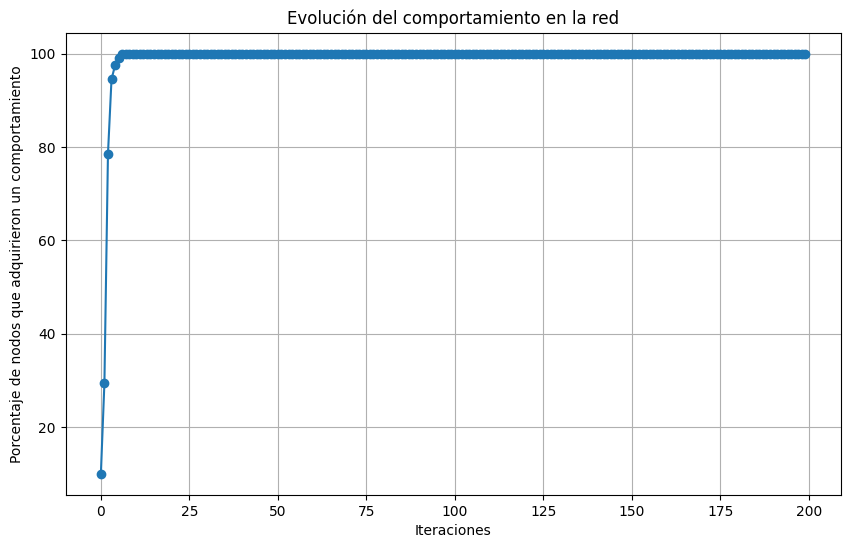

In [3]:
import matplotlib.pyplot as plt

# Extraer el número de nodos que adquirieron un comportamiento en cada iteración
adopted_nodes = [iteration['node_count'][1] for iteration in iterations]

# Calcular el porcentaje de nodos que adquirieron un comportamiento
total_nodes = len(g.nodes())
adopted_percentage = [count / total_nodes * 100 for count in adopted_nodes]

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(range(len(adopted_percentage)), adopted_percentage, marker='o')
plt.xlabel('Iteraciones')
plt.ylabel('Porcentaje de nodos que adquirieron un comportamiento')
plt.title('Evolución del comportamiento en la red')
plt.grid(True)
plt.show()

Se añade la visualización de la red

In [38]:
import networkx as nx
from pyvis.network import Network

# Crear el grafo
g = nx.barabasi_albert_graph(200, 2)

# Crear la red con opciones adicionales
net = Network(
    height='100vh', 
    width='100%', 
    bgcolor='#ffffff',
    font_color='#000000',
    notebook=True
)

# Configurar opciones
net.set_options("""
{
  "physics": {
    "enabled": false,
    "barnesHut": {
      "gravitationalConstant": -5000,
      "centralGravity": 0.1,
      "springLength": 95,
      "springConstant": 0.04,
      "damping": 0.09
    },
    "minVelocity": 0.75,
    "maxVelocity": 5
  },
  "configure": {
    "enabled": true
  }
}
""")

# Agregar nodos y aristas
for node in g.nodes():
    net.add_node(node, color='blue')

for edge in g.edges():
    net.add_edge(edge[0], edge[1])

# Mostrar la red (sin show_buttons)
net.show('mi_red.html')

mi_red.html
